#### Explore DataSet

Columns | Definition
---|---------
`age` | Age of Persons
`workclass` | Describe work type 
`fnlwgt` | Financial Weight
`education` | Person's education level
`martial status` | Person's martial status
`occupation` | Person's usual or principal work or business
`sex` | Gender of Person
`race` | Person's race
`capital gain` | Person's capital gain
`capital loss` | Person's capital loss
`hours per hour` | Earn per hour
`native country` | Persons native country
`income` | Whether <50k or not

*The goal is to accurately predict whether or not someone is making more or less than $50,000 a year.*,

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import *
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Import data
data = pd.read_csv("income.csv")

# EDA

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

### There is a little space in column names

In [8]:
data.columns = [cols.replace(' ', '') for cols in data.columns]

### Almost every value has space in it. So lets fix it

In [9]:
data['income'][0]#.strip()

' <=50K'

##### We have a problem here. Our result column has sampling

<AxesSubplot:xlabel='income', ylabel='count'>

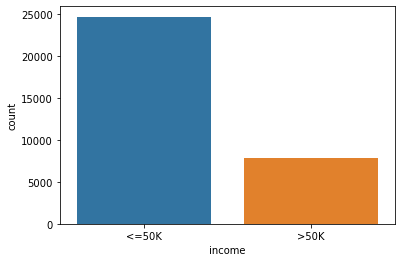

In [10]:
data["income"] = [cols.replace(' ', '') for cols in data["income"]]
sns.countplot(data=data,x='income')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'State-gov'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Private'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, '?'),
  Text(6, 0, 'Self-emp-inc'),
  Text(7, 0, 'Without-pay'),
  Text(8, 0, 'Never-worked')])

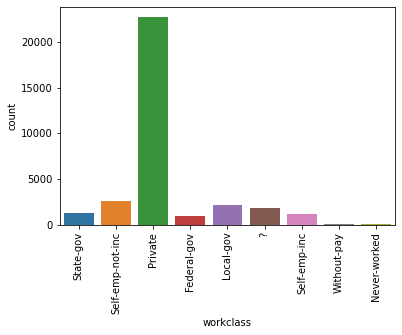

In [11]:
data["workclass"] = [cols.replace(' ', '') for cols in data["workclass"]]
sns.countplot(data=data,x='workclass')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, '11th'),
  Text(3, 0, 'Masters'),
  Text(4, 0, '9th'),
  Text(5, 0, 'Some-college'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, 'Assoc-voc'),
  Text(8, 0, '7th-8th'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, 'Prof-school'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, '10th'),
  Text(13, 0, '1st-4th'),
  Text(14, 0, 'Preschool'),
  Text(15, 0, '12th')])

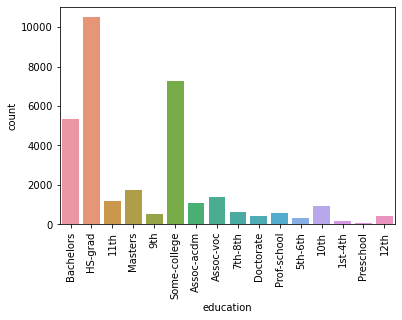

In [12]:
data["education"] = [cols.replace(' ', '') for cols in data["education"]]
sns.countplot(data=data,x='education')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Married-spouse-absent'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-AF-spouse'),
  Text(6, 0, 'Widowed')])

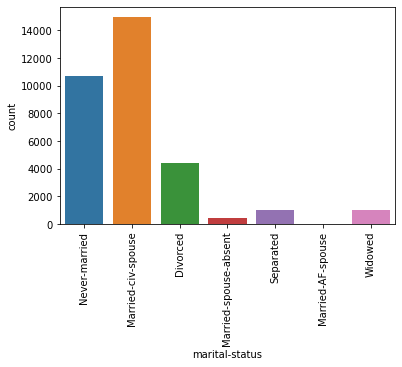

In [13]:
data["marital-status"] = [cols.replace(' ', '') for cols in data["marital-status"]]
sns.countplot(data=data,x='marital-status')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Cuba'),
  Text(2, 0, 'Jamaica'),
  Text(3, 0, 'India'),
  Text(4, 0, '?'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'South'),
  Text(7, 0, 'Puerto-Rico'),
  Text(8, 0, 'Honduras'),
  Text(9, 0, 'England'),
  Text(10, 0, 'Canada'),
  Text(11, 0, 'Germany'),
  Text(12, 0, 'Iran'),
  Text(13, 0, 'Philippines'),
  Text(14, 0, 'Italy'),
  Text(15, 0, 'Poland'),
  Text(16, 0, 'Columbia'),
  Text(17, 0, 'Cambodia'),
  Text(18, 0, 'Thailand'),
  Text(19, 0, 'Ecuador'),
  Text(20, 0, 'Laos'),
  Text(21, 0, 'Taiwan'),
  Text(22, 0, 'Haiti'),
  Text(23, 0, 'Portugal'),
  Text(24, 0, 'Dominican-Republic'),
  Text(25, 0, 'El-Salvador'),
  Text(26, 0, 'France'),
  Text(27, 0, 'Guatemala'),
  Text(28, 0, 'China'),
  Text(29, 0, 'Japan'),
  Text(30, 0, 'Yugoslavia'),
  T

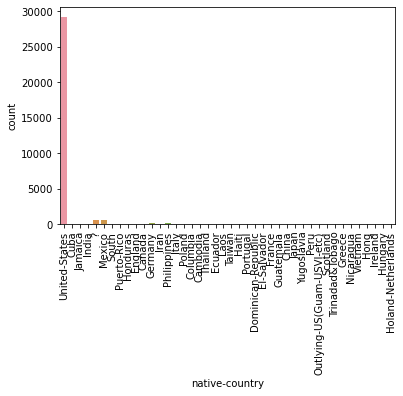

In [14]:
data["native-country"] = [cols.replace(' ', '') for cols in data["native-country"]]
sns.countplot(data=data,x='native-country')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Machine-op-inspct'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, '?'),
  Text(12, 0, 'Protective-serv'),
  Text(13, 0, 'Armed-Forces'),
  Text(14, 0, 'Priv-house-serv')])

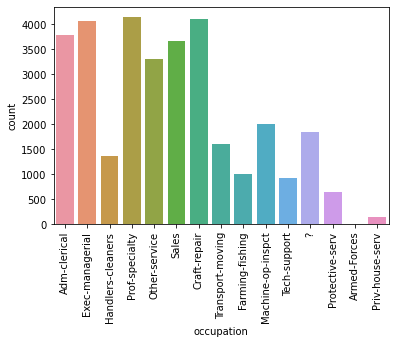

In [15]:
data["occupation"] = [cols.replace(' ', '') for cols in data["occupation"]]
sns.countplot(data=data,x='occupation')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Not-in-family'),
  Text(1, 0, 'Husband'),
  Text(2, 0, 'Wife'),
  Text(3, 0, 'Own-child'),
  Text(4, 0, 'Unmarried'),
  Text(5, 0, 'Other-relative')])

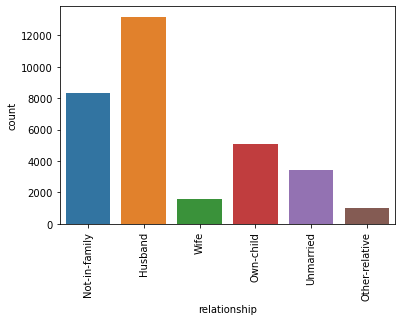

In [16]:
data["relationship"] = [cols.replace(' ', '') for cols in data["relationship"]]
sns.countplot(data=data,x='relationship')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Amer-Indian-Eskimo'),
  Text(4, 0, 'Other')])

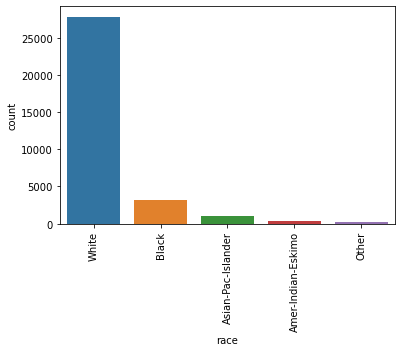

In [17]:
data["race"] = [cols.replace(' ', '') for cols in data["race"]]
sns.countplot(data=data,x='race')
plt.xticks(rotation=90)

In [18]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

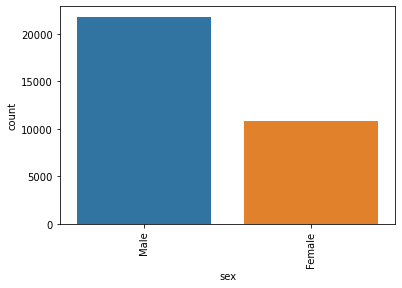

In [19]:
data["sex"] = [cols.replace(' ', '') for cols in data["sex"]]
sns.countplot(data=data,x='sex')
plt.xticks(rotation=90)

### In some columns there are a missing value as "?" but we should convert actual None .

In [20]:
data = data.replace('?', np.nan)

In [21]:
# Chechking null values 
def about_data(df):
    total_missing_values = df.isnull().sum().reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'total missing'})
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values


### There are 3 columns have null value. we can drop it because of percentage of missing value very low. 

In [22]:
about_data(data)

,columns,total missing,ration of missing
0,age,0,0.000000
1,workclass,1836,0.056386
2,fnlwgt,0,0.000000
3,education,0,0.000000
4,education-num,0,0.000000
5,marital-status,0,0.000000
6,occupation,1843,0.056601
7,relationship,0,0.000000
8,race,0,0.000000
9,sex,0,0.000000


In [23]:
data.dropna(inplace=True,axis=0)

In [24]:
about_data(data)

,columns,total missing,ration of missing
0,age,0,0.0
1,workclass,0,0.0
2,fnlwgt,0,0.0
3,education,0,0.0
4,education-num,0,0.0
5,marital-status,0,0.0
6,occupation,0,0.0
7,relationship,0,0.0
8,race,0,0.0
9,sex,0,0.0


####  > We are all ready for visualization

# Visualization

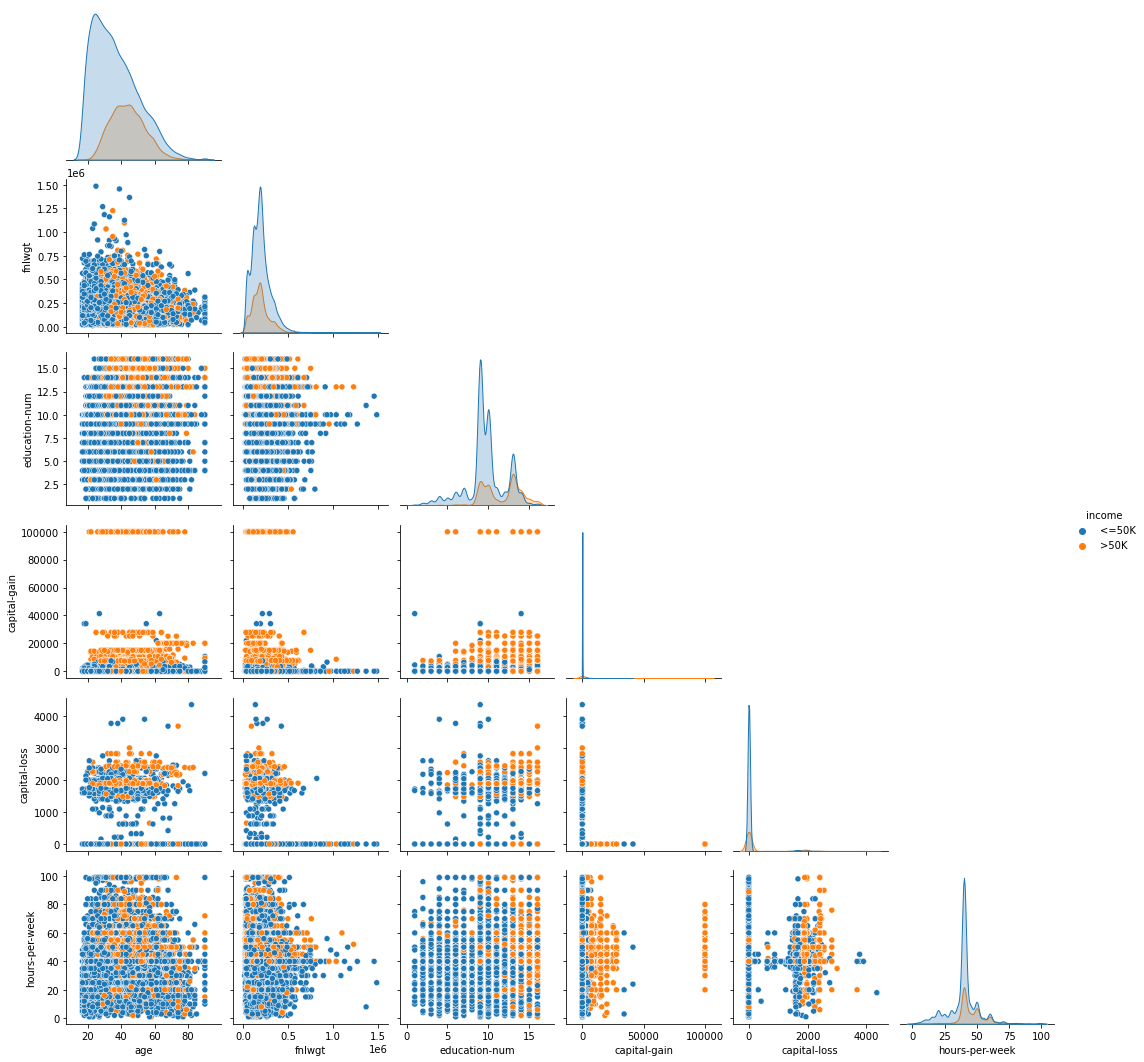

In [25]:
sns.pairplot(data,hue='income',corner=True)

<AxesSubplot:>

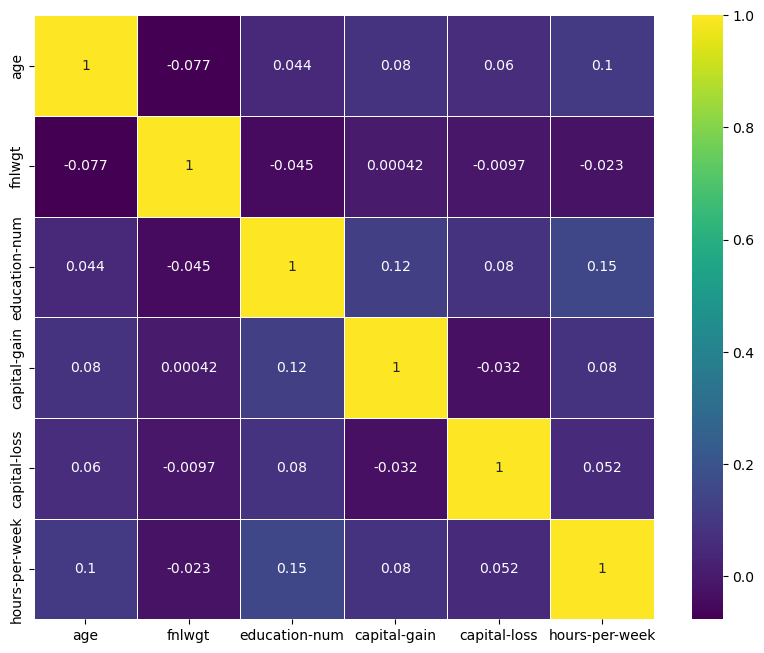

In [26]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(data.corr(),cmap="viridis",annot=True,linewidth=0.5)

<AxesSubplot:xlabel='income', ylabel='education-num'>

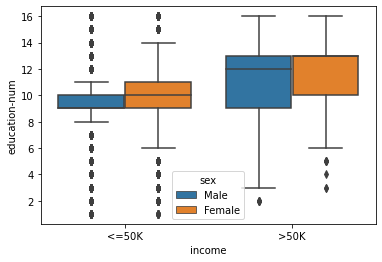

In [27]:
sns.boxplot(x='income',y='education-num',data=data,hue="sex")

In [28]:
def hist(x,title):
    plt.figure(figsize=(10,8))
    ax = sns.distplot(x, kde=False,bins=30)
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches,colors):
        rec.set_color(col)
    plt.title(title, size=20, color='black')

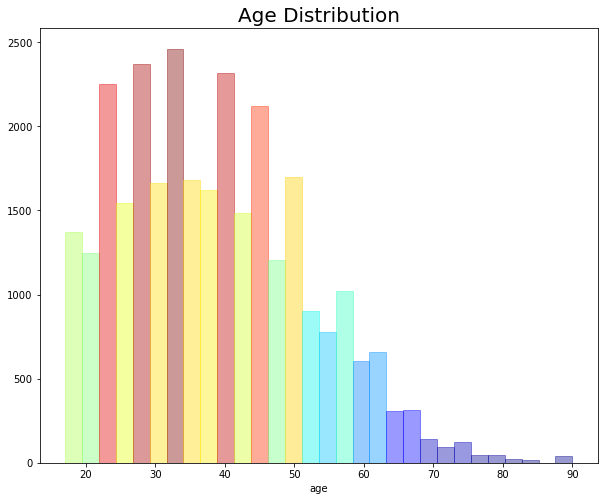

In [29]:
hist(data.age,"Age Distribution")

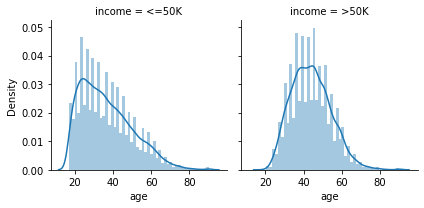

In [30]:
# Explore Age vs Income
grid = sns.FacetGrid(data, col='income')
grid = grid.map(sns.distplot, "age")

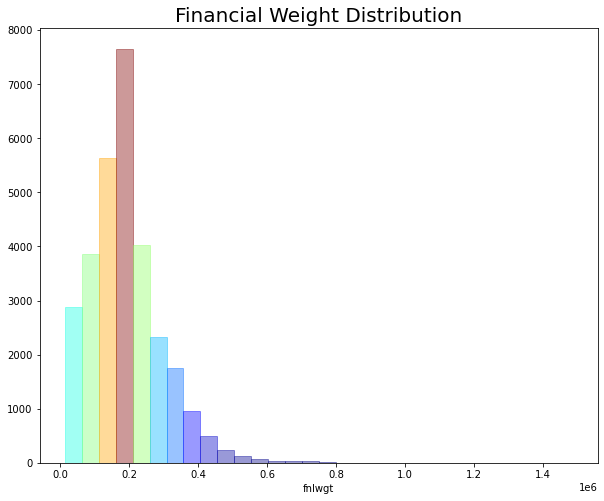

In [31]:
hist(data.fnlwgt,"Financial Weight Distribution")

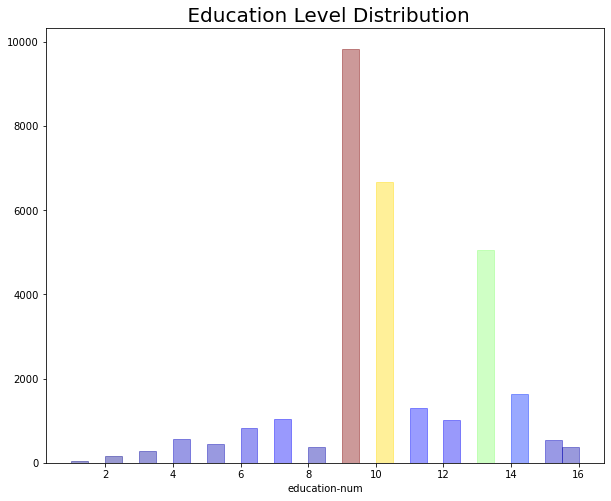

In [32]:
hist(data["education-num"]," Education Level Distribution")

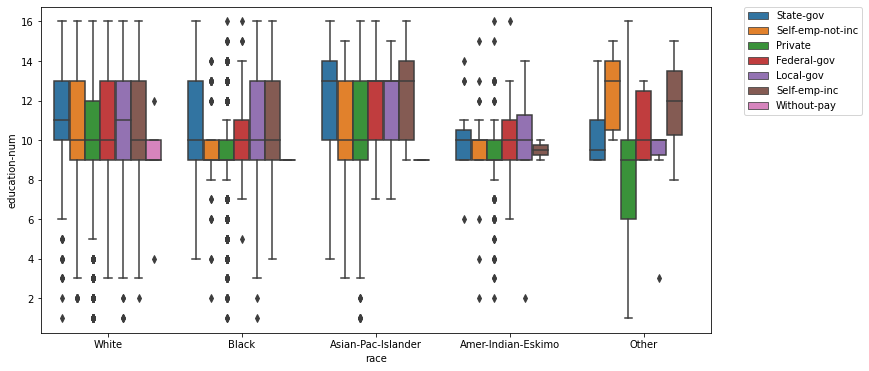

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x='race',y='education-num',data=data,hue='workclass')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'State-gov'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Private'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'Without-pay')])

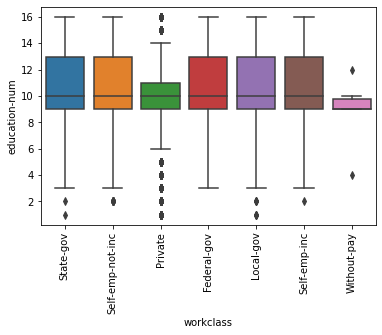

In [34]:
sns.boxplot(x='workclass',y='education-num',data=data)
plt.xticks(rotation=90)

### We need to change categorical values to numeric values. 

In [35]:
cat_columns = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']
for col in cat_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [36]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,<=50K
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,>50K
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,<=50K
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,<=50K


Now we are ready for split data

In [37]:
X = data.drop("income",axis=1)
y = data["income"]

# Imbalace Problem

Data imbalance usually reflects an unequal distribution of classes within a dataset. For example, in a income evaluation dataset, most of the income is higher that 50.000dollars. We have very small data for >50K. This leaves us with something like 50:1 ratio between the  >50K and <50K classes.

<div style="width:100%;text-align: center;"> <img align=middle src="https://miro.medium.com/max/1838/1*P93SeDGPGw0MhwvCcvVcXA.png" alt="Heat beating" style="height:300px;margin-top:3rem;"> </div>

In [38]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [39]:
y_ros.value_counts()

<=50K    22654
>50K     22654
Name: income, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=101)

### Scale Data

In [41]:
scaler = StandardScaler()

In [42]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Model

In [43]:
trees = 100
max_features = 3
results = []
names_of_models = []

model_list = [
             ('DTC', DecisionTreeClassifier()),
             ('RFC', RandomForestClassifier(n_estimators=trees,max_features=3))]


for name, model in model_list:
    kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    cv_results = cross_val_score(model, scaled_X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names_of_models.append(name)
    res = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(res)

DTC: 0.9136033452652429 (0.0034170553491853174)
RFC: 0.9293965189234263 (0.002260912242339111)


> #### *It seems like Random Forest has highest accuracy. So, lets choose random forest model and tune params*

#  Random Forest Model Tune

In [44]:
parameters_for_testing = {
"n_estimators"    : [50,150,250] ,
 "max_features"        : [3,4,5],
}
model = RandomForestClassifier()

kfold = KFold(n_splits=10, random_state=7,shuffle=True)
grid_cv = GridSearchCV(estimator=model, param_grid=parameters_for_testing, scoring='accuracy', cv=kfold)
result = grid_cv.fit(scaled_X_train, y_train)

print("Best: {} using {}".format(result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{}  {} with: {}" .format(mean, stdev, param))

Best: 0.9300341886078953 using {'max_features': 3, 'n_estimators': 150}
0.929568279958518  0.0025514507437610014 with: {'max_features': 3, 'n_estimators': 50}
0.9300341886078953  0.0023976825418289224 with: {'max_features': 3, 'n_estimators': 150}
0.9292003984600992  0.003111458196765345 with: {'max_features': 3, 'n_estimators': 250}
0.9288325831230904  0.0025676320875492745 with: {'max_features': 4, 'n_estimators': 50}
0.9291268570455224  0.0027404650390062363 with: {'max_features': 4, 'n_estimators': 150}
0.9297153748170187  0.0019623461450292475 with: {'max_features': 4, 'n_estimators': 250}
0.92870980559011  0.002843429094902012 with: {'max_features': 5, 'n_estimators': 50}
0.9287345198840902  0.0027486365054552164 with: {'max_features': 5, 'n_estimators': 150}
0.9293475654946833  0.002239350724696724 with: {'max_features': 5, 'n_estimators': 250}


>  ### ReTrain with new tuned parameters

In [72]:
tuned_model_rf = RandomForestClassifier(n_estimators=50,max_features=3)
tuned_model_rf.fit(scaled_X_train, y_train)
predictions = tuned_model_rf.predict(scaled_X_test)

# Performance

In [73]:
accuracy_score(y_test,predictions)

0.9439417347163982

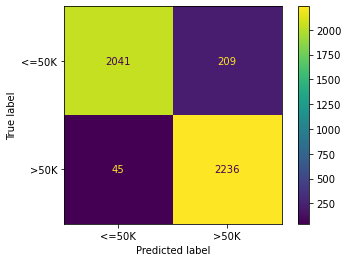

In [74]:
plot_confusion_matrix(tuned_model_rf,scaled_X_test,y_test)

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       <=50K       0.98      0.91      0.94      2250
        >50K       0.91      0.98      0.95      2281

    accuracy                           0.94      4531
   macro avg       0.95      0.94      0.94      4531
weighted avg       0.95      0.94      0.94      4531



### Feature Importance

#### Top 5 feature 

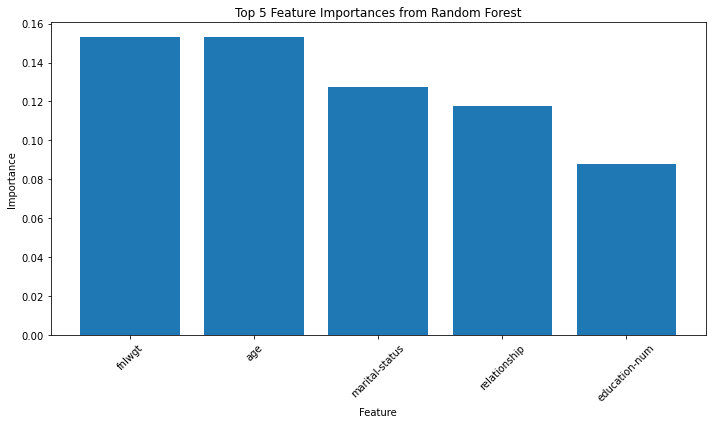

In [76]:
importances = tuned_model_rf.feature_importances_

# Get indices of top 5 features
top5_indices = np.argsort(importances)[::-1][:5]
top5_importances = importances[top5_indices]
top5_feature_names = data.columns[top5_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(5), top5_importances, tick_label=top5_feature_names)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importances from Random Forest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Evaluating Curves and AUC

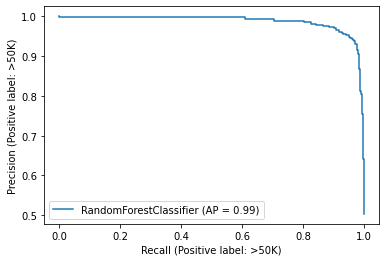

In [77]:
plot_precision_recall_curve(tuned_model_rf,scaled_X_test,y_test)

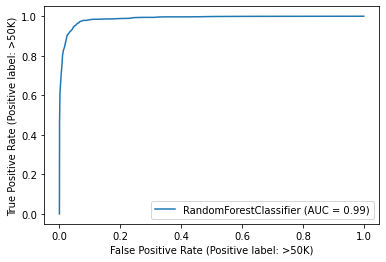

In [78]:
plot_roc_curve(tuned_model_rf,scaled_X_test,y_test)